In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

sns.set(style='white', context = 'notebook', palette = 'deep')

In [3]:
train = pd.read_csv('../input/digit-recognizer/train.csv')
test = pd.read_csv('../input/digit-recognizer/test.csv')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

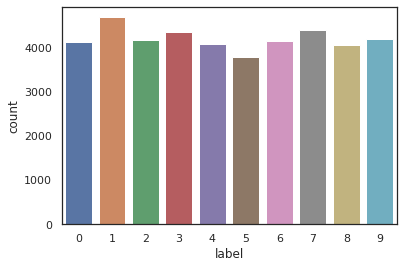

In [4]:
y_train = train['label']
x_train = train.drop(columns = ['label'], axis = 1)

del train

g = sns.countplot(y_train)
y_train.value_counts()

In [5]:
x_train.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [6]:
test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

There is no missing value!

In [7]:
x_train = x_train / 255
test = test / 255

In [8]:
x_train = x_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

# reshape[-1, 28, 28, 1]
# reshape[batch_size, width, height, channel]
# batch_size = -1 : 자동으로 batch_size 조정
# 파이프라인을 변경해서 batch_size를 변경해야하더라도 reshape의 batch_size 크기를 바꿔줄 필요가 없어짐

In [9]:
y_train = to_categorical(y_train, num_classes = 10)

# Labels are 10 digits numbers from 0 to 9. We need to encode these lables to one hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0]).

In [10]:
random_seed = 2

In [11]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.1, random_state = random_seed)

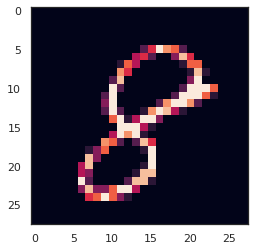

In [12]:
g = plt.imshow(x_train[0][:,:,0])

In [13]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5), padding = 'Same', activation = 'relu', input_shape = (28, 28, 1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5), padding = 'Same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (3, 3), padding = 'Same', activation = 'relu'))
model.add(Conv2D(filters = 64, kernel_size = (3, 3), padding = 'Same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'softmax'))

In [14]:
optimizer = RMSprop(lr = 0.001, rho = 0.9, epsilon = 1e-08, decay = 0.0)

In [15]:
model.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [16]:
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_accuracy', patience = 3, verbose = 1, factor = 0.5, min_lr = 0.00001)

In [19]:
epochs = 15
batch_size = 86

In [20]:
datagen = ImageDataGenerator(featurewise_center = False, # set input mean to 0 over the dataset
                            samplewise_center = False, # set each sample mean to 0
                            featurewise_std_normalization = False, # divide inputs by std by its dataset
                            samplewise_std_normalization = False, # divide each input by its std
                            zca_whitening = False, # apply ZCA whitening
                            rotation_range = 10, # randomly rotate images in the range (degrees, 0 to 180)
                            zoom_range = 0.1, # randomly zoom image
                            width_shift_range = 0.1, # randomly shift images horizontalliy
                            height_shift_range = 0.1, # randomly shift images vertically
                            horizontal_flip = False, # randomly flip images
                            vertical_flip = False) # randomly flip images
datagen.fit(x_train)

# horizontal_flip, vertical_flip would be False, because it could lead to misclassify symetrical numbers such as 6 and 9.

In [21]:
history = model.fit_generator(datagen.flow(x_train, y_train, batch_size = batch_size), epochs = epochs, validation_data = (x_val, y_val), verbose = 2, steps_per_epoch = x_train.shape[0]//batch_size, callbacks = [learning_rate_reduction])

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
439/439 - 18s - loss: 0.4195 - accuracy: 0.8654 - val_loss: 0.0740 - val_accuracy: 0.9788
Epoch 2/15
439/439 - 11s - loss: 0.1261 - accuracy: 0.9619 - val_loss: 0.0430 - val_accuracy: 0.9871
Epoch 3/15
439/439 - 12s - loss: 0.0953 - accuracy: 0.9717 - val_loss: 0.0407 - val_accuracy: 0.9890
Epoch 4/15
439/439 - 12s - loss: 0.0767 - accuracy: 0.9779 - val_loss: 0.0248 - val_accuracy: 0.9919
Epoch 5/15
439/439 - 12s - loss: 0.0725 - accuracy: 0.9796 - val_loss: 0.0306 - val_accuracy: 0.9914
Epoch 6/15
439/439 - 12s - loss: 0.0641 - accuracy: 0.9809 - val_loss: 0.0211 - val_accuracy: 0.9931
Epoch 7/15
439/439 - 11s - loss: 0.0623 - accuracy: 0.9813 - val_loss: 0.0203 - val_accuracy: 0.9929
Epoch 8/15
439/439 - 11s - loss: 0.0593 - accuracy: 0.9827 - val_loss: 0.0225 - val_accuracy: 0.9929
Epoch 9/15
439/439 - 12s - loss: 0.0609 - accuracy: 0.9826 - val_loss: 0.0254 - val_accuracy: 0.9924

Epoch 00009: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 10/1

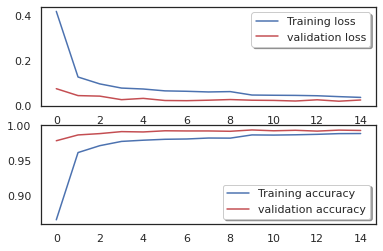

In [22]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color = 'b', label = 'Training loss')
ax[0].plot(history.history['val_loss'], color = 'r', label = 'validation loss', axes = ax[0])
legend = ax[0].legend(loc = 'best', shadow = True)

ax[1].plot(history.history['accuracy'], color = 'b', label = 'Training accuracy')
ax[1].plot(history.history['val_accuracy'], color = 'r', label = 'validation accuracy')
legend = ax[1].legend(loc = 'best', shadow = True)

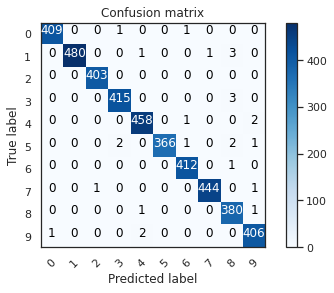

In [25]:
def plot_confusion_matrix(cm, classes, normalize = False, title = 'Confusion matrix', cmap = plt.cm.Blues):
    """This function prints and plots the confusion matrix.
    Normalization can be applied by setting 'normalize = True.'"""
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
    
    thresh = cm.max() / 2.
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment = 'center', color = 'white' if cm[i, j] > thresh else 'black')
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
y_pred = model.predict(x_val)
y_pred_classes = np.argmax(y_pred, axis = 1)
y_true = np.argmax(y_val, axis = 1)
confusion_mtx = confusion_matrix(y_true, y_pred_classes)
plot_confusion_matrix(confusion_mtx, classes = range(10))

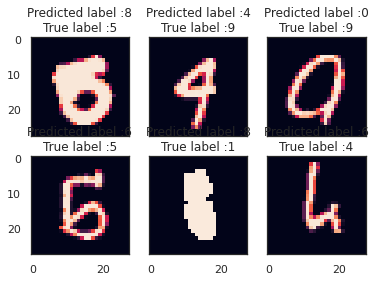

In [31]:
errors = (y_pred_classes - y_true != 0)
y_pred_classes_errors = y_pred_classes[errors]
y_pred_errors = y_pred[errors]
y_true_errors = y_true[errors]
x_val_errors = x_val[errors]

def display_errors(errors_index, img_errors, pred_errors, obs_errors):
    """This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows, ncols, sharex=True ,sharey = True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row, col].imshow((img_errors[error]).reshape((28, 28)))
            ax[row, col].set_title('Predicted label :{}\nTrue label :{}'.format(pred_errors[error], obs_errors[error]))
            n+=1

y_pred_errors_prob = np.max(y_pred_errors, axis = 1)
true_prob_errors = np.diagonal(np.take(y_pred_errors, y_true_errors, axis = 1))

delta_pred_true_errors = y_pred_errors_prob - true_prob_errors

sorted_dela_errors = np.argsort(delta_pred_true_errors)

most_important_errors = sorted_dela_errors[-6:]

display_errors(most_important_errors, x_val_errors, y_pred_classes_errors, y_true_errors)

In [32]:
results = model.predict(test)
results = np.argmax(results, axis = 1)
results = pd.Series(results, name = 'Label')

In [33]:
submission = pd.concat([pd.Series(range(1, 28001), name = 'ImageId'), results], axis = 1)
submission.to_csv('cnn_mnist_datagen.csv', index = False)